In [ ]:
#!pip install kaggle

In [ ]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets list
#!pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/DiamondsPrices.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:

data.shape

(53940, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<ipython-input-45-60525374c04a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='color', palette=custom_palette)


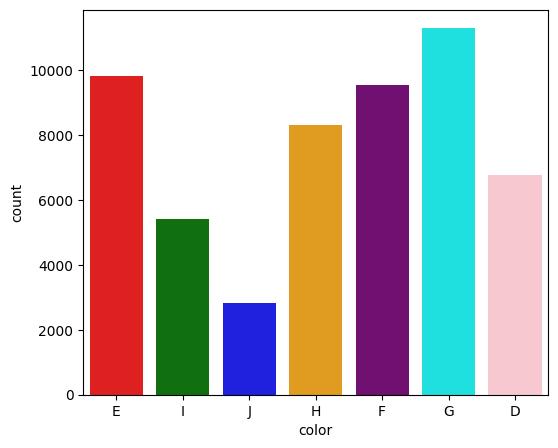

In [ ]:
plt.figure(figsize=(6, 5))
custom_palette = ["red", "green", "blue", "orange", "purple","cyan","pink"]
sns.countplot(data=data, x='color', palette=custom_palette)
plt.show()

<ipython-input-46-75dea470a95a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()
<ipython-input-46-75dea470a95a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap=custom_cmap, fmt=".2f", linewidths=.5)


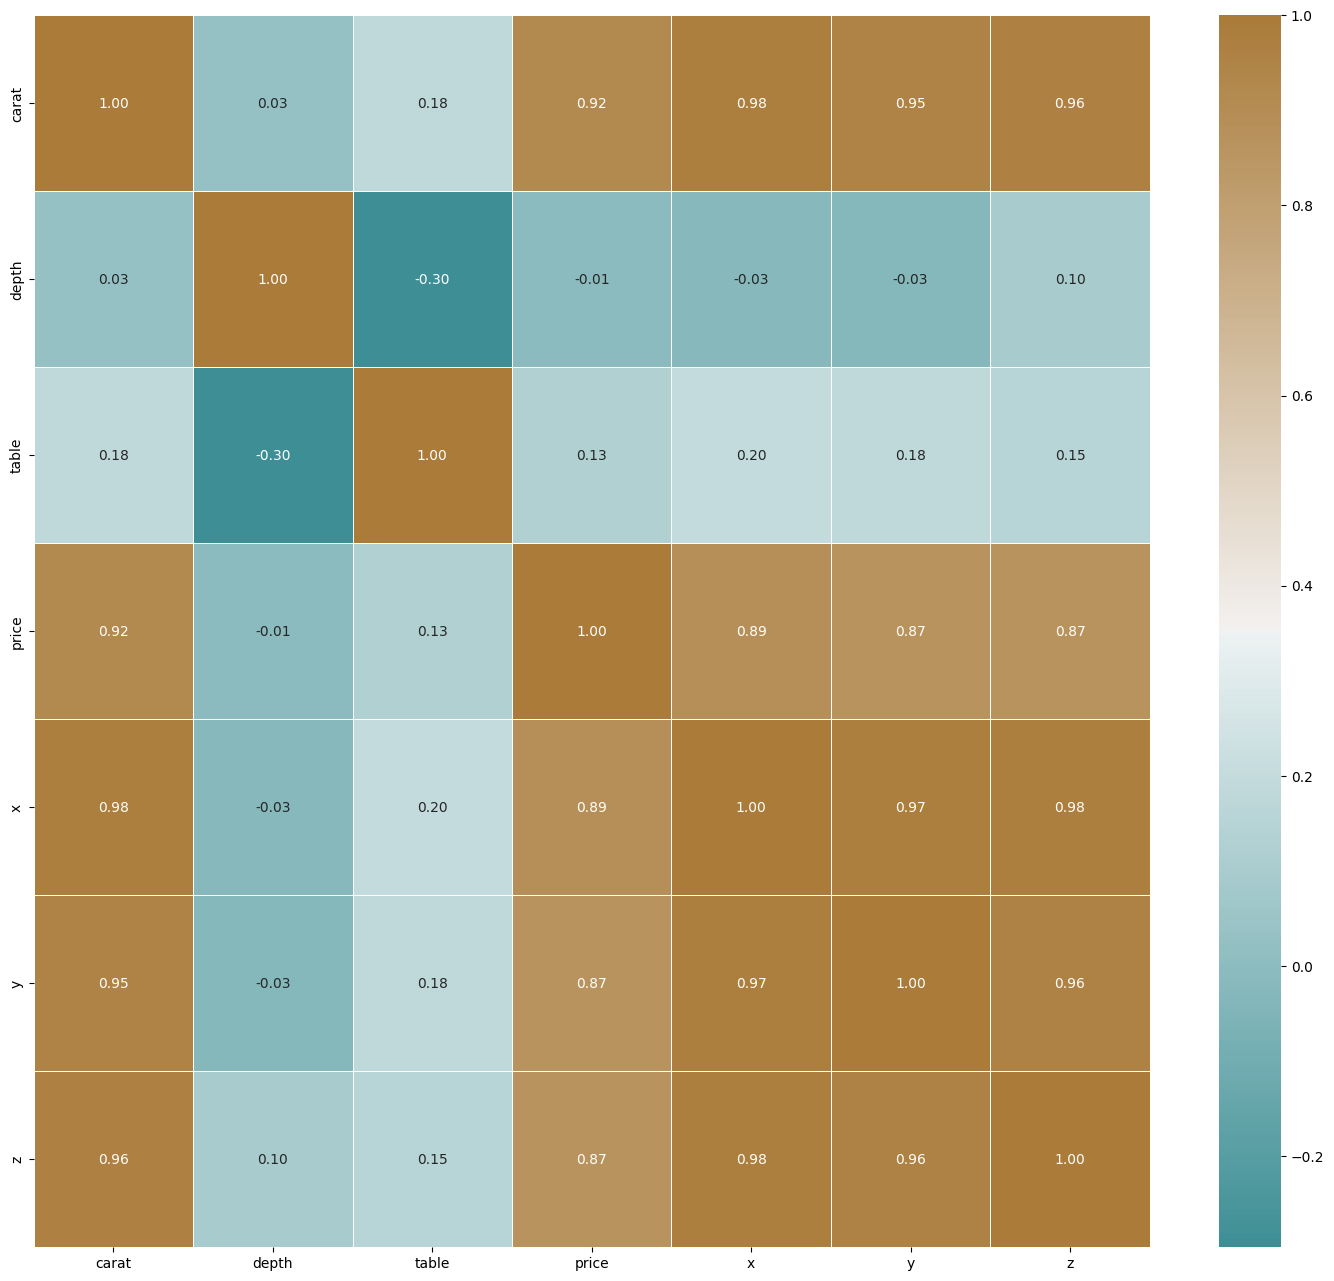

In [ ]:
correlation = data.corr()
plt.figure(figsize=(18, 16))

custom_cmap = sns.diverging_palette(200, 50, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(data.corr(), annot=True, cmap=custom_cmap, fmt=".2f", linewidths=.5)
plt.show()

In [ ]:
# correlation value of price
print(correlation['price'])

carat    0.921592
depth   -0.010729
table    0.127245
price    1.000000
x        0.887231
y        0.867864
z        0.868206
Name: price, dtype: float64


<ipython-input-48-af122e4a80bf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'],color='green')


<Axes: xlabel='price', ylabel='Density'>

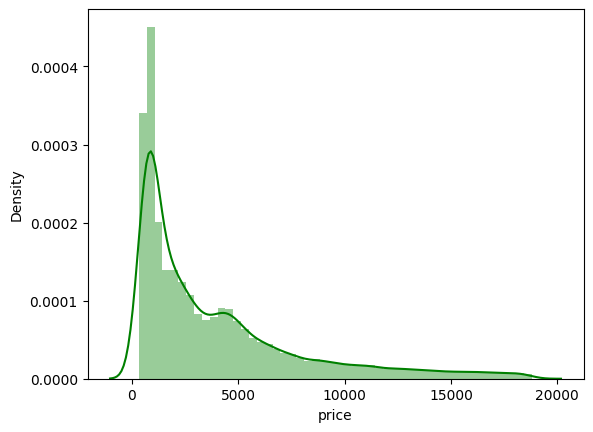

In [ ]:
#distibution of the diamond price
sns.distplot(data['price'],color='green')

MODELING

In [ ]:
x= data.drop([''])

In [ ]:

# Feature Engineering
data['symmetry'] = data['x'] / data['y']

# Handle Missing Values (consider imputation if necessary)
data = data.dropna(axis=0)

# One-Hot Encoding
data_trans = pd.get_dummies(data)

# Define Features and Target
X = data_trans.drop(['price', 'x', 'y', 'z'], axis=1)
Y = data_trans['price']
features = X.columns



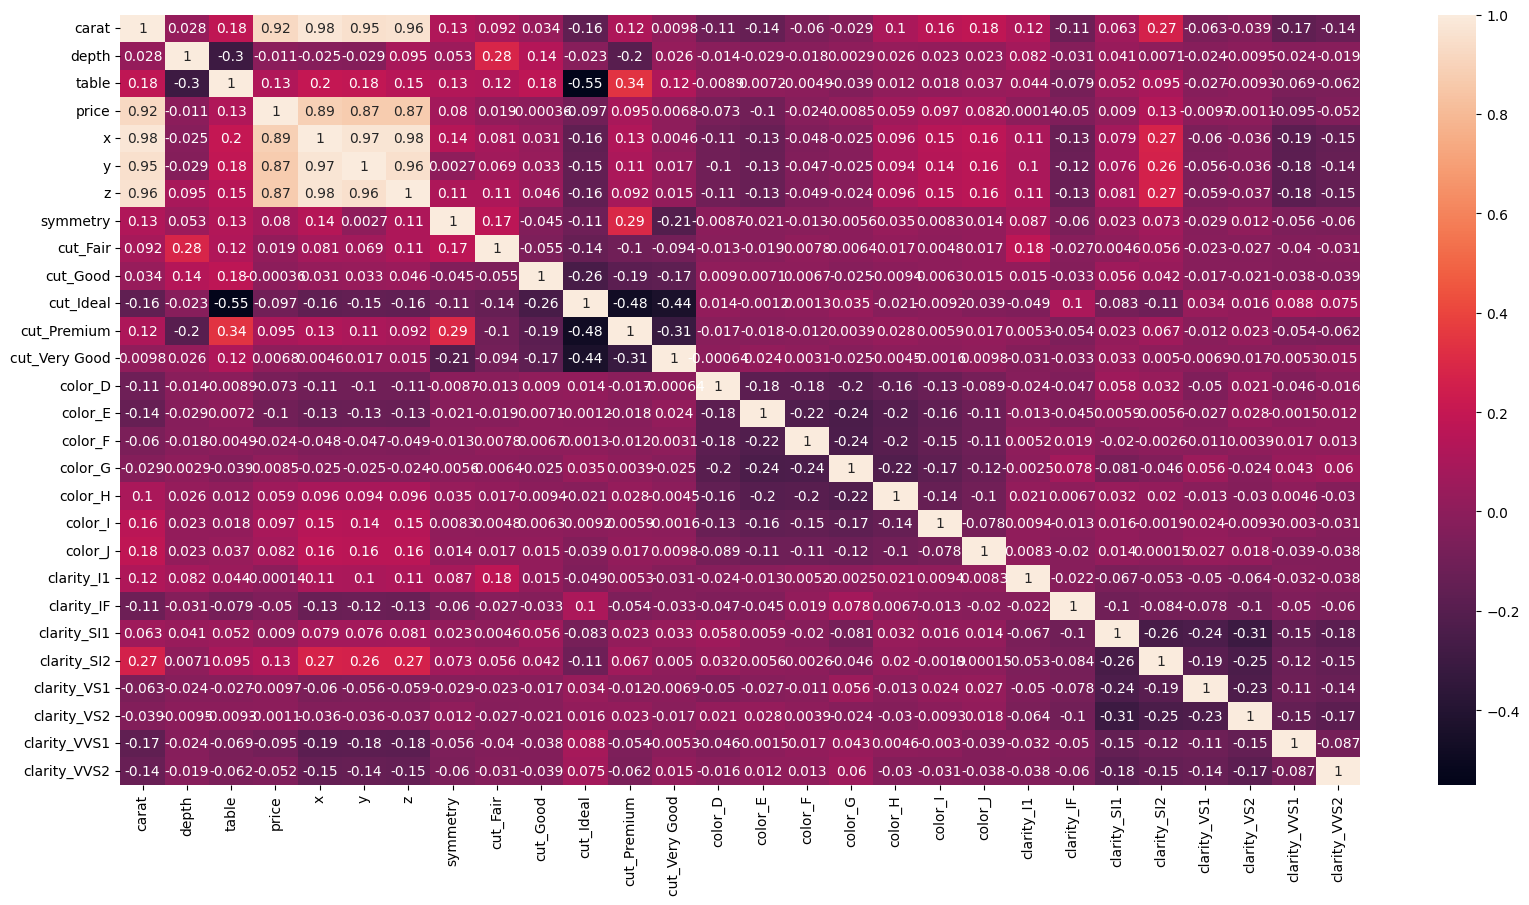

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data_trans.corr(),annot=True);

In [ ]:
# Feature Scaling
s = StandardScaler()
X = s.fit_transform(X)

In [ ]:
# Train-Test Split with Random State for Reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
models_eval = pd.DataFrame(index=['Null','KNN','MLR'],columns=['RMSE'])

In [59]:
Ypred_null = Y_train.mean()


Forest regression

In [63]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,Y_train)
Y_pred2=Y_pred = rf.predict(X_test)

Linear regression

In [64]:
lin = LinearRegression()
lin = lin.fit(X_train,Y_train)
Y_pred3 = lin.predict(X_test)

In [67]:
model_eval=pd.DataFrame(index=['KNN','MLR'],columns=['RMSE'])
model_eval.loc['RF','RMSE'] = np.sqrt(mean_squared_error(Y_test,Y_pred2))
model_eval.loc['MLR','RMSE'] = np.sqrt(mean_squared_error(Y_test,Y_pred3))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval

,RMSE
KNN,NaN
MLR,1125.686009
RF,543.96891
NULL,3926.531459


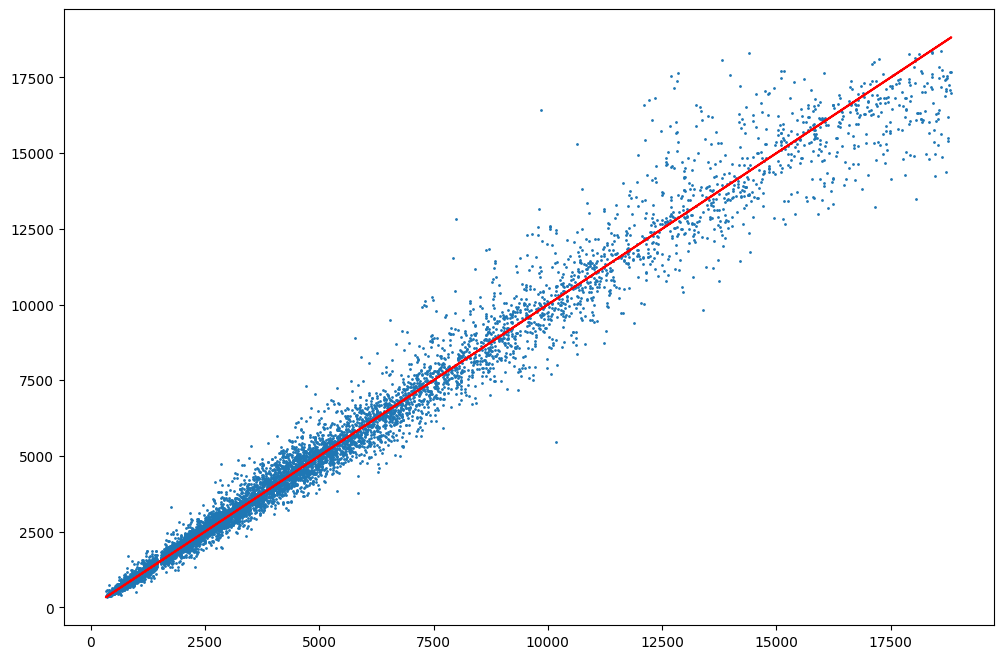

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(Y_test,Y_pred,s=1)
ax.plot(Y_test,Y_test,color='red')

<ipython-input-69-1fb77530d153>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pred-Y_test)


<Axes: xlabel='price', ylabel='Density'>

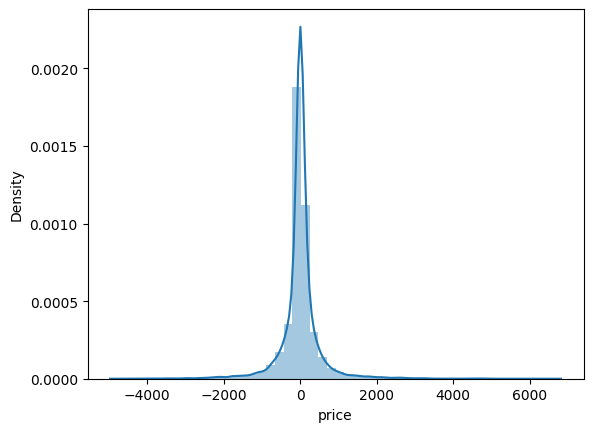

In [69]:
sns.distplot(Y_pred-Y_test)

In [70]:
lin=LinearRegression()
lin.fit(X_train,Y_train)
Y_pred2 = lin.predict(X_test)
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(Y_pred2,Y_test))

In [71]:
#features importance
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [72]:
model.feature_importances_.tolist()

[0.8800761346336193,
 0.004114456552383405,
 0.004289263547397229,
 0.004763004816848092,
 0.0011258197256164301,
 0.0006543624667787595,
 0.002260493091338581,
 0.0011415456633468361,
 0.0005189080285662416,
 0.004085512802486026,
 0.0044981048113089785,
 0.002023034540727595,
 0.003252048516930357,
 0.006060763931048589,
 0.00816310492097547,
 0.009792537839631466,
 0.014544395421355473,
 0.0031744333967490914,
 0.012539154592640902,
 0.017476600267263234,
 0.004040343190797839,
 0.005328227524219391,
 0.002552950055461948,
 0.0035247996625088194]